In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from luwiji.knn import illustration, demo
%matplotlib inline

In [4]:
!ls data

titanic.csv


In [6]:
df = pd.read_csv('./data/titanic.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


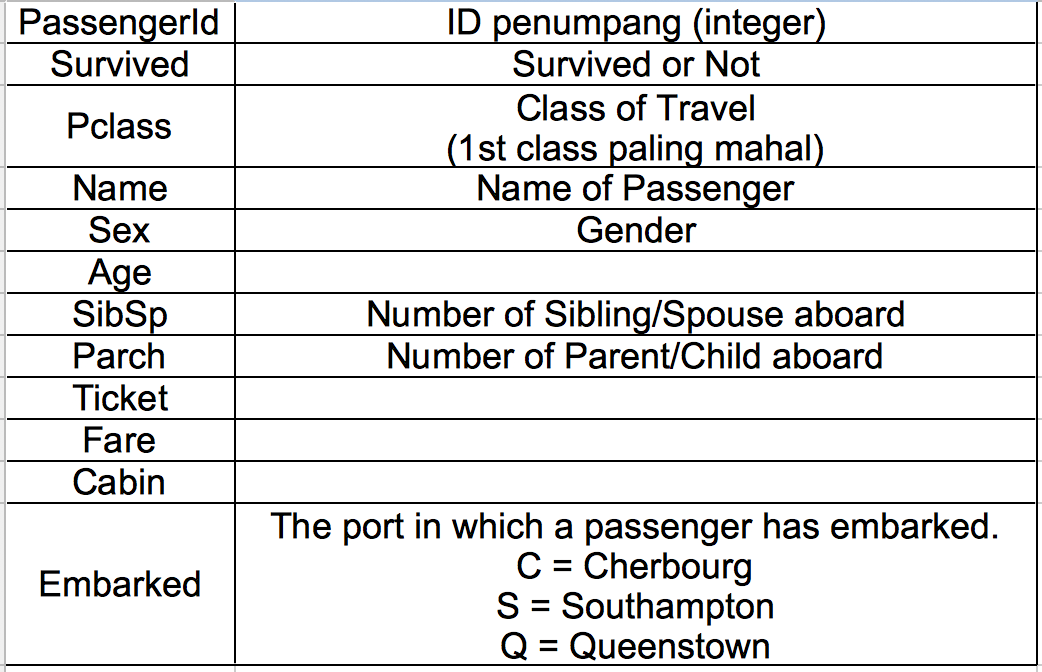

In [7]:
illustration.nomenklatur

# Mini EDA 

###  Plot Missing Value

In [9]:
from jcopml.plot import plot_missing_value

,missing_value,%
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00
Cabin,687,77.10


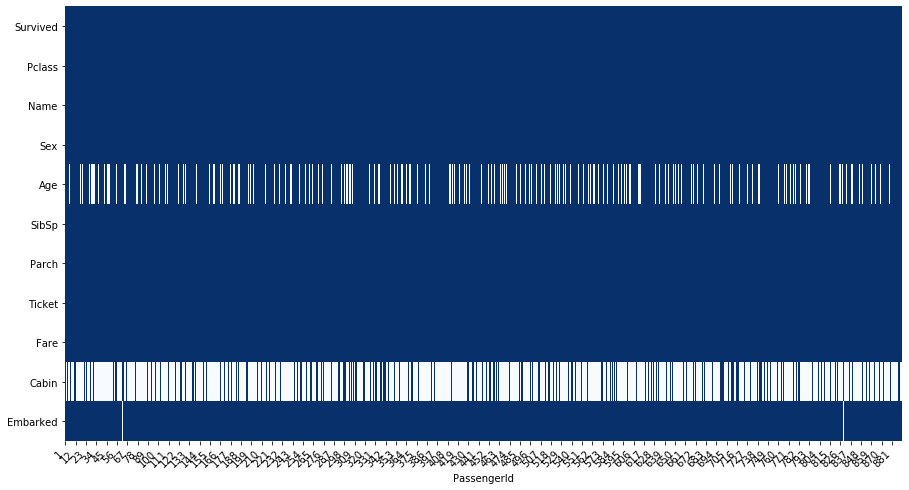

In [10]:
# cek apakah ada data kosong
plot_missing_value(df=df, return_df=True)

Kita akan drop kolom Age dan Cabin karena mengandung banyak missing values

In [11]:
df.drop(columns=['Age', 'Cabin'], inplace=True)

In [14]:
df.drop(columns=['Name', 'Ticket'], inplace=True)

Kita punya data kosong pada kolom Embarked dan kita akan coba mengisi data kosong tersebut dengan modus (data yang sering muncul)

In [17]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [18]:
filler = {
    "Embarked": "S"
}

df.fillna(filler, inplace=True)

,missing_value,%
Survived,0,0.0
Pclass,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Fare,0,0.0
Embarked,0,0.0


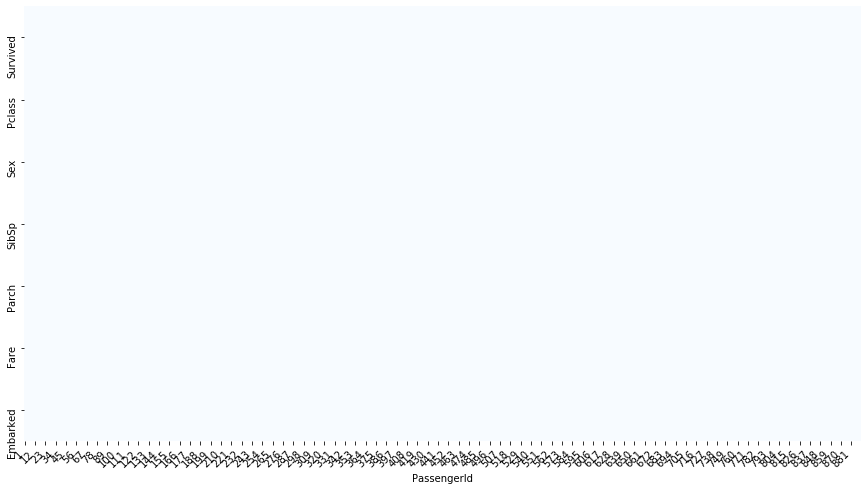

In [19]:
plot_missing_value(df=df, return_df=True)

# Data Preparation 

Ada 2 langkah data preparation:
1. Kita akan membagi data target (y) dan juga fitur yang akan digunakan untuk prediksi (x)
2. Kita akan convert semua data yang bersifat kategori menjadi dummies (one hot encoding)
3. Melakukan data set splitting

In [21]:
# step 1
# target adalah kolom Survived
x = df.drop(columns='Survived')
y = df['Survived']

In [23]:
y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [26]:
# step 2
x.dtypes

Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [28]:
# kita cek apakah SibSp masuk ke dalam kategorik atau numerik.
# Karena ada kemungkinan SibSp nilainya 6 atau 7 atau di atas 8, saat ini kita anggap SibSp sebagai data numerik
# kalau kita anggap sebagai data kategorik maka data baru yang memiliki nilai SibSp 6 itu tidak di bisa di predict

df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [29]:
# one hot encoding untuk kolom yang bersifat kategorik
x = pd.get_dummies(x, columns=['Sex', 'Embarked'])
x.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,
1,3,1,0,7.2500,0,1,0,0,1
2,1,1,0,71.2833,1,0,1,0,0
3,3,0,0,7.9250,1,0,0,0,1
4,1,1,0,53.1000,1,0,0,0,1
5,3,0,0,8.0500,0,1,0,0,1


In [51]:
x['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [33]:
pd.DataFrame(y)

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
...,...
887,0
888,1
889,0


# Intro to scikit learn 

In [30]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
# inisasi KNN dengan jumlah tetangga terdekat 1
knn = KNeighborsClassifier(n_neighbors=1)

In [34]:
# train model KNN dengan x sebagai features dan y adalah target
knn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [35]:
# cek akurasi model
knn.score(x, y)

# kenyataannya data yang akan digunakan untuk train itu harus di pisah dengan data yang akan digunakan untuk 
# testing ataupun validasi

0.8933782267115601

# Konsep 1: Dataset Splitting 

_Supervised Learning_
- memiliki label
- tujuan: membuat model yang mampu memprediksi diluar data yang di training (should generalize enough)

Bagaimana cara kita cek generality ? 
- Dataset Splitting, jangan pakai semua data untuk training, tetapi sisihkan sebagian data sebagai test set
- Ibaratnya jangan kasih soal ujian untuk dipelajari, tapi justru kasih PR untuk dipelajari, dan diuji menggunakan soal ujian yang baru

Tapi kan train score nya tinggi ? 
- Justru train score tinggi itu wajar karena memang data itu yang dia pelajari
- Tapi suatu model kita bisa bilang performanya baik ketika test score nya tinggi padahal dia belum pernah sentuh data demikian

---

Dataset splitting digunakan untuk memisahkan antara data yang akan digunakan untuk membuat model dan data yang akan digunakan untuk melihat akurasi ataupun performa dari model. Kita tidak ingin ketika melakukan modelling, model sebelumnya melihat data yang akan kita gunakan untuk testing (lihat performa)

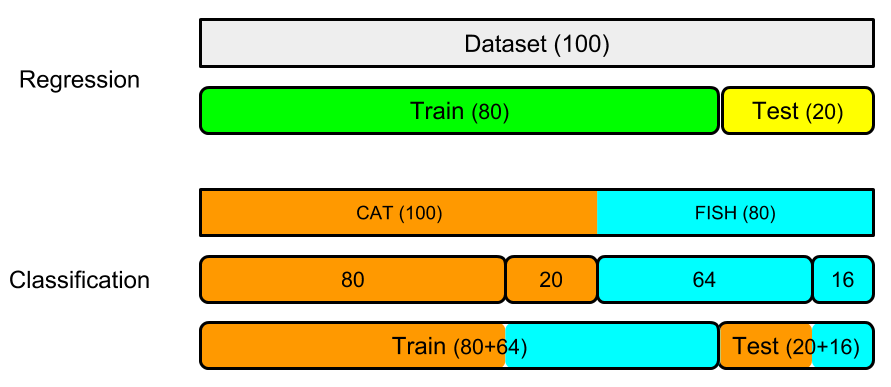

In [36]:
illustration.train_test_split

Untuk klasfikasi kita menggunakan train_test_split dengan sebutan stratified train_test_split, dimana per kelas target (misal kelas target adalah 0 dan 1) akan di split 80:20 artinya kelas 0 akan kita split 80:20 dan kelas 1 juga akan kita split 80:20. 

Masing-masing yang displit 80 kmeudian dikumpulkan sebagai data training, sedangkan masing-masing data 20% dikumpulkan juga sebagai data testing.

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# step 3
# train test split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((712, 9), (179, 9), (712,), (179,))

In [41]:
# modelling menggunakan data train dan data test
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train), knn.score(X_test, y_test))

0.9157303370786517 0.7039106145251397


# Konsep 2: K-fold cross validation 

_K-fold Splitting_
- membuat K skenario splitting untuk mengurangi efek 'kebetulan' dan memberikan score yang lebih robust
- Karena ada K skenario, maka akan diperoleh K score berbeda. Rata-rata nya lah yang kita pakai sebagai acuan

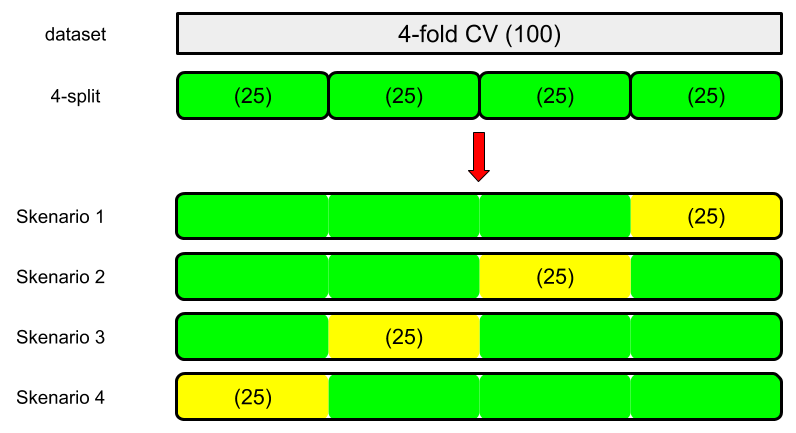

In [42]:
illustration.kfold_cv

In [43]:
from sklearn.model_selection import cross_val_score

In [50]:
# melihat scoring hasil 4 kali cross validation
scores = cross_val_score(knn, x, y, cv=4)
scores

array([0.70403587, 0.78026906, 0.73542601, 0.74324324])

In [49]:
# rata-rata performance model sebanyak 4 kali cross validation
scores.mean()

0.7328843995510663

# How to improve our model ?

Banyak sekali hal yang bisa kita coba untuk improve model kita. Secara umum, dapat dibagi menjadi 2:
- **improvement melalui data**
- feature engineering
- **improvement melalui model**
    - tuning model yang sedang digunakan
    - menggunakan model berbeda
    
## Improvement melalui data

Pada dasarnya terdapat banyak sekali metode feature engineering, dan sangat bergantung dengan kondisi datanya.<br>
Berikut beberapa contoh feature engineering:
- **Feature scaling**
    - MinMax
    - Standard
    - Robust
- **Feature transformation**
    - logaritmik
    - pangkat
    - trigonometrik
- **Type conversion**
    - categorical to numerical (encoding & hashing)
    - numerical to categorical (binning)
- **Adding feature**
    - domain knowledge
    - Feature crossing
    - Feature summation or differencing
- **Reducing feature**
    - Dimensionality reduction
    - Feature importance and selection
- **Text Data**
    - Flattening
    - Filtering
    - Chunking
    
Kita akan pelajari satu-per-satu seiring berjalannya course ini, dan juga mempertimbangkan kesesuaian dengan data kita<br>
Untuk sekarang, mari kita coba **feature scaling**

# Konsep 3: Feature scaling

Scaling sangat dibutuhkan untuk algoritma-algoritma yang menggunakan perhitungan jarak / *distance* sebagai basisnya

In [52]:
demo.knn_scaling()

interactive(children=(IntSlider(value=1, description='N', max=11, min=1, step=2), FloatSlider(value=7000000.0,…

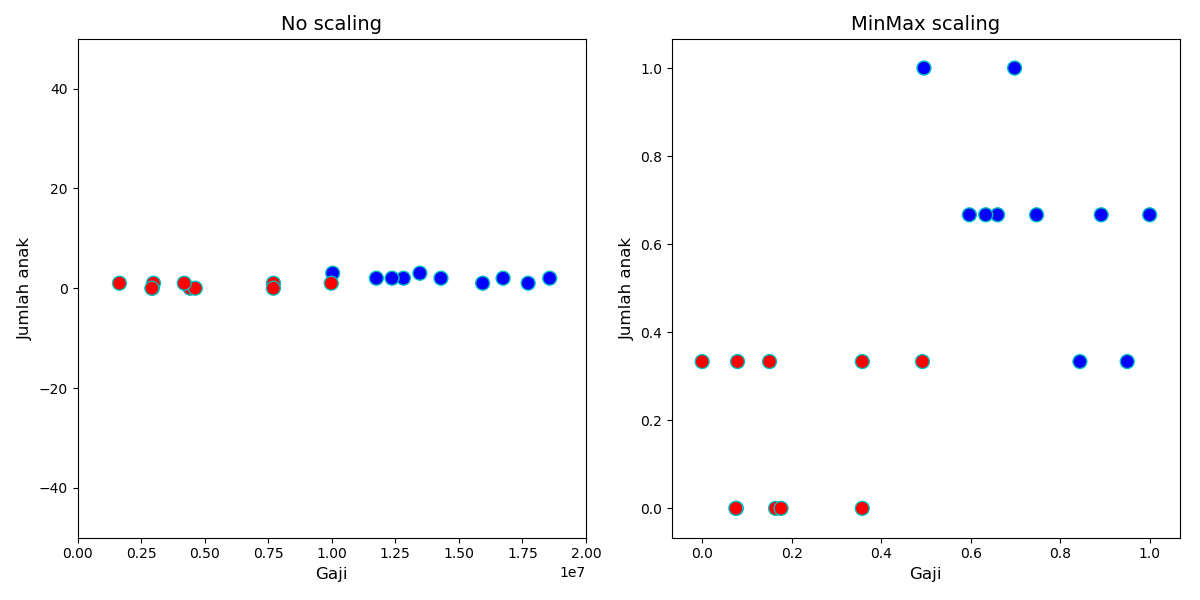

In [54]:
illustration.knn_scaling

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
scaler = MinMaxScaler() # inisiasi scaling
scaler.fit(X_train) # melihat informasi scaling pada data train
X_train_scaled = scaler.transform(X_train) # melakukan scaling pada data train
X_test_scaled = scaler.transform(X_test) # melakukan scaling data test dari informasi data train

In [59]:
# melihat data setelah di scaling
pd.DataFrame(X_train_scaled, columns=X_train.columns)

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.000,0.000000,0.110272,0.0,1.0,0.0,0.0,1.0
1,0.5,0.000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0
2,0.0,0.000,0.000000,0.432884,0.0,1.0,0.0,0.0,1.0
3,1.0,0.000,0.166667,0.018250,1.0,0.0,0.0,0.0,1.0
4,0.5,0.125,0.166667,0.051237,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
707,1.0,0.000,0.000000,0.015379,1.0,0.0,0.0,1.0,0.0
708,0.0,0.000,0.000000,1.000000,1.0,0.0,1.0,0.0,0.0
709,1.0,0.125,0.500000,0.067096,1.0,0.0,0.0,0.0,1.0
710,0.0,0.000,0.000000,0.075147,0.0,1.0,0.0,0.0,1.0


In [60]:
knn = KNeighborsClassifier(n_neighbors=1) # inisiasi KNN dengan tetangga terdekat 1
knn.fit(X_train_scaled, y_train) # training model KNN terhadap data X_train yang sudah di scale
print(knn.score(X_train_scaled, y_train), knn.score(X_test_scaled, y_test))

0.9297752808988764 0.7597765363128491


# Konsep 4: Improve dari model

Dari model, yang bisa kita tuning adalah:
1. Jumlah tetangga (n-neighbor)
2. Tuning dengan scaling atau tidak menggunakan scaling
3. Tuning untuk weights dari distance
4. Tuning p (euclidean, manhattan)

## Tuning n-neighbor 

Nilai maksimum test score adalah 0.7374301675977654
Nilai maksimum train score adalah 0.9157303370786517
K dengan nilai test score terbaik adalah 9


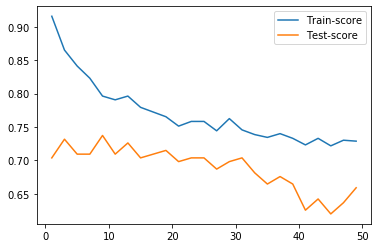

In [65]:
# kita mau simpan nilai neighbors, train_score dan test_score
neighbors = []
train_score = []
test_score = []

for k in range(1, 51, 2):
    knn = KNeighborsClassifier(n_neighbors=k) # k di tuning sesuai range(1, 51, 2)
    knn.fit(X_train, y_train)
    
    neighbors.append(k) # kita save nilai neighbor
    train_score.append(knn.score(X_train, y_train)) # save nilai train terhadap k 
    test_score.append(knn.score(X_test, y_test)) # save nilai test terhadap k
    
plt.plot(neighbors, train_score, label='Train-score') # plot sumbu x (neighbor) dan y (train score)
plt.plot(neighbors, test_score, label='Test-score') # plot sumbu x (neighbor) dan y (test score)
plt.legend()

print(f"Nilai maksimum test score adalah {np.max(test_score)}")
print(f"Nilai maksimum train score adalah {np.max(train_score)}")
print(f"K dengan nilai test score terbaik adalah {neighbors[np.argmax(test_score)]}") 

In [68]:
np.argmax(test_score) # 4 adalah indeks untuk test_score

4

In [69]:
neighbors[4] # melihat nilai neighbors berdasarkan index test_score terbaik

9

## Tuning n-neighbor menggunakan data yang sudah di scale 

Nilai maksimum test score adalah 0.7988826815642458
Nilai maksimum train score adalah 0.9297752808988764
K dengan nilai test score terbaik adalah 25


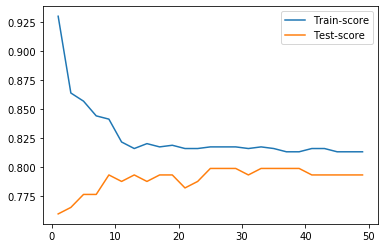

In [70]:
# kita mau simpan nilai neighbors, train_score dan test_score
neighbors = []
train_score = []
test_score = []

for k in range(1, 51, 2):
    knn = KNeighborsClassifier(n_neighbors=k) # k di tuning sesuai range(1, 51, 2)
    knn.fit(X_train_scaled, y_train)
    
    neighbors.append(k) # kita save nilai neighbor
    train_score.append(knn.score(X_train_scaled, y_train)) # save nilai train terhadap k 
    test_score.append(knn.score(X_test_scaled, y_test)) # save nilai test terhadap k
    
plt.plot(neighbors, train_score, label='Train-score') # plot sumbu x (neighbor) dan y (train score)
plt.plot(neighbors, test_score, label='Test-score') # plot sumbu x (neighbor) dan y (test score)
plt.legend()

print(f"Nilai maksimum test score adalah {np.max(test_score)}")
print(f"Nilai maksimum train score adalah {np.max(train_score)}")
print(f"K dengan nilai test score terbaik adalah {neighbors[np.argmax(test_score)]}")

## Tuning dengan memperhatikan distance 

Nilai maksimum test score adalah 0.7932960893854749
Nilai maksimum train score adalah 0.9325842696629213
K dengan nilai test score terbaik adalah 17


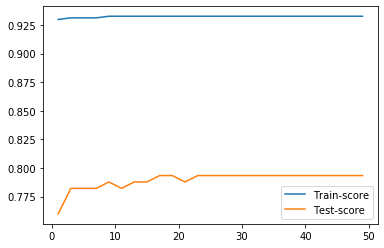

In [71]:
# kita mau simpan nilai neighbors, train_score dan test_score
neighbors = []
train_score = []
test_score = []

for k in range(1, 51, 2):
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance') # k di tuning sesuai range(1, 51, 2)
    knn.fit(X_train_scaled, y_train)
    
    neighbors.append(k) # kita save nilai neighbor
    train_score.append(knn.score(X_train_scaled, y_train)) # save nilai train terhadap k 
    test_score.append(knn.score(X_test_scaled, y_test)) # save nilai test terhadap k
    
plt.plot(neighbors, train_score, label='Train-score') # plot sumbu x (neighbor) dan y (train score)
plt.plot(neighbors, test_score, label='Test-score') # plot sumbu x (neighbor) dan y (test score)
plt.legend()

print(f"Nilai maksimum test score adalah {np.max(test_score)}")
print(f"Nilai maksimum train score adalah {np.max(train_score)}")
print(f"K dengan nilai test score terbaik adalah {neighbors[np.argmax(test_score)]}")

## Tuning dengan menggunakan distance dan juga nilai P (distance calculation: euclidean, manhattan) 

Nilai maksimum test score adalah 0.7932960893854749
Nilai maksimum train score adalah 0.9325842696629213
K dengan nilai test score terbaik adalah 19


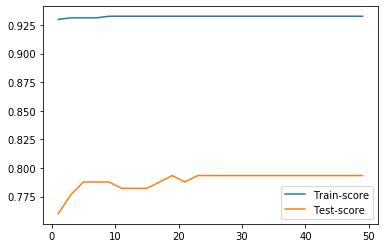

In [72]:
# kita mau simpan nilai neighbors, train_score dan test_score
neighbors = []
train_score = []
test_score = []

for k in range(1, 51, 2):
    # k di tuning sesuai range(1, 51, 2), p = 1 adalah manhattan
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance', p=1) 
    knn.fit(X_train_scaled, y_train)
    
    neighbors.append(k) # kita save nilai neighbor
    train_score.append(knn.score(X_train_scaled, y_train)) # save nilai train terhadap k 
    test_score.append(knn.score(X_test_scaled, y_test)) # save nilai test terhadap k
    
plt.plot(neighbors, train_score, label='Train-score') # plot sumbu x (neighbor) dan y (train score)
plt.plot(neighbors, test_score, label='Test-score') # plot sumbu x (neighbor) dan y (test score)
plt.legend()

print(f"Nilai maksimum test score adalah {np.max(test_score)}")
print(f"Nilai maksimum train score adalah {np.max(train_score)}")
print(f"K dengan nilai test score terbaik adalah {neighbors[np.argmax(test_score)]}")

Masih banyak yang bisa kita coba karena disini kita masih belum mencoba beberapa hal seperti:
1. K-fold cross validation
2. Adjust untuk P selain 1 dan 2

Next kita akan coba merapikan kerangka pekerjaan project machine learning menggunakan pipeline:
- splitting
- feature scalling dll
- paramater tuning